In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train) ,(X_test , y_test) = datasets.cifar10.load_data()
X_train.shape #50,000 training sample he 32x32 ki or 3 is the rgb channel

(50000, 32, 32, 3)

In [3]:
X_test.shape #test sample hmare pass 10,000 he

(10000, 32, 32, 3)

In [4]:
y_train[:5] # checking the first 5 samples

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,) # we dont want to change the first dimension (ye 1d array me convert kardega)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
y_train[:5] # now we got a single array

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[9]

'truck'

In [10]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))  # ye size reduce karne ke liye kiya 
    plt.imshow(X[index])    #ye matplot lib me ek imshow function he jo image show karta he
    plt.xlabel(classes[y[index]]) # jese niche frog print ho ker aya na vo print karta he ye

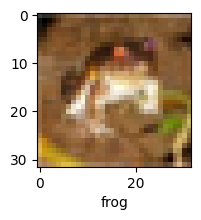

In [11]:
plot_sample(X_train,y_train,0)   #hamne plot_sample function ko call kiya 0th index pe frog ki image thi isliye vo show hui

In [12]:
#we want to normalize our data , so whenever we have an image we have to divide each pixel value by 255 bcz the pixel value ranges from 0 to 255 for
#each channel r,g,b
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
X_train[0]/255 #numpy array ko agar 255 se divide kar rhe to vo saare elements ko divide kardega 

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
X_train = X_train/255
X_test = X_test/255                 
# ye hamne normalize kardiya input images ko matlab 0 se 1 ki range me le aae
# 0 ka matlab pure black, aur 255 ka matlab pure white.
#Jab tum X_train / 255 ya X_test / 255 karte ho, toh tum har pixel value ko 255 se divide kar rahe ho.
#Iska result yeh hota hai ki har pixel value 0 se 1 ke beech aa jati hai.
#Normalization ka Fayda:
# Better Performance: Neural networks aur machine learning models zyada efficiently kaam karte hain jab input values 0 aur 1 ke range mein hoti hain.
# Faster Convergence: Gradient descent optimization techniques fast converge karti hain jab inputs normalize hote hain.



In [16]:
#CNN Convolutional Neural Network  
# in Cnn we don't need to tell what filter it has to choose it will choose it by its own we just need to define filer size and how many filter we want
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)), # convolution layer ko add kiya
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)), # convolution layer ko add kiya
    layers.MaxPooling2D((2,2)) ,
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # softmax is good for normalization  ye output layer he or hmare pass 10 classes he isliye yha 10 aya h
])
#Softmax activation ke saath har neuron ek specific 
#class ko represent karta hai, aur jo neuron sabse zyada active hoga (highest value) woh predicted class batata hai.

In [19]:
cnn.compile(optimizer ='adam',   #Adam optimizer ek advanced version hai gradient descent ka.
            loss ='sparse_categorical_crossentropy', # ye actual label or predicted probability ke bich error calculate karta h
            metrics = ['accuracy'])

In [20]:
cnn.fit(X_train,y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.3726 - loss: 1.7170
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5819 - loss: 1.1978
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6391 - loss: 1.0364
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6733 - loss: 0.9444
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6943 - loss: 0.8870
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7119 - loss: 0.8277
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7270 - loss: 0.7895
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7372 - loss: 0.7518
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7449 - loss: 0.7274
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7584 - loss: 0.6878


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6900 - loss: 0.9134


[0.9315603375434875, 0.6904000043869019]

In [22]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

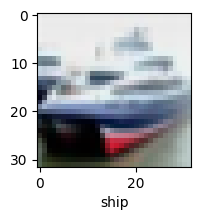

In [23]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[5.6501362e-03, 1.0449681e-04, 4.8922850e-03, 9.6851546e-01,
        3.3404108e-04, 1.4743407e-02, 4.9060215e-03, 3.3388867e-05,
        3.4094548e-05, 7.8665203e-04],
       [4.3040369e-02, 1.3605352e-02, 4.6151462e-07, 8.4426233e-07,
        3.3492694e-07, 1.0013469e-08, 1.4014719e-06, 3.9768754e-08,
        9.4246376e-01, 8.8737579e-04],
       [2.1152809e-01, 2.2774917e-01, 2.9761402e-03, 3.9727846e-03,
        4.0049516e-03, 1.2395666e-03, 6.2825071e-04, 1.4355774e-02,
        1.6114131e-01, 3.7240398e-01],
       [9.4267505e-01, 2.9375232e-03, 8.6924614e-04, 1.0332406e-03,
        1.8871633e-02, 8.0895676e-05, 2.7282251e-04, 5.9834409e-05,
        3.2315813e-02, 8.8384841e-04],
       [4.0960717e-07, 3.0521625e-07, 3.2514189e-03, 7.4883578e-03,
        5.3693819e-01, 1.6161802e-03, 4.5070031e-01, 4.4351500e-06,
        1.4261036e-07, 2.6883092e-07]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred] # it is like a for loop
y_classes[:5]   # ye hamne 5 row me predicted class nikali he jese first row me 9.68 max he jo 0-based indexing se 3 he to matlab 3 class predict hui

[3, 8, 9, 0, 4]

In [27]:
y_test[:5]  # see it is giving almost similar values # ye actual label he or uper predicted label he

array([3, 8, 8, 0, 6], dtype=uint8)

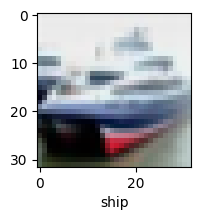

In [28]:
plot_sample(X_test,y_test,1) # hm check kar rhe ki actual me test data me index 1 pe kya he

In [29]:
classes[y_classes[1]] # predicted value

'ship'

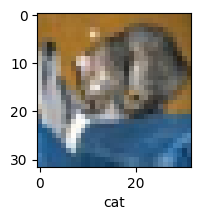

In [30]:
plot_sample(X_test,y_test,0)

In [31]:
classes[y_classes[0]]

'cat'

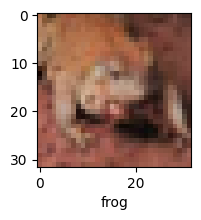

In [32]:
plot_sample(X_test,y_test,5)

In [33]:
classes[y_classes[5]]

'frog'

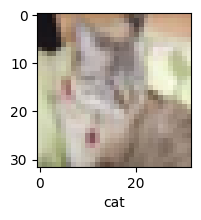

In [34]:
plot_sample(X_test,y_test,8)

In [35]:
classes[y_classes[8]]

'cat'

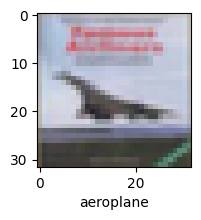

In [36]:
plot_sample(X_test,y_test,3)

In [37]:
classes[y_classes[3]]

'aeroplane'

In [39]:
print("classification Report: \n",classification_report(y_test,y_classes))

NameError: name 'classification_report' is not defined

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification Report: \n",classification_report(y_test,y_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.83      0.70      1000
           1       0.81      0.84      0.82      1000
           2       0.57      0.61      0.59      1000
           3       0.48      0.52      0.50      1000
           4       0.65      0.65      0.65      1000
           5       0.67      0.49      0.57      1000
           6       0.76      0.81      0.78      1000
           7       0.78      0.70      0.74      1000
           8       0.89      0.70      0.78      1000
           9       0.78      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

